In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

In [41]:

df=pd.read_csv("H:\DATA SETS\Dementia-Classification-Compare-Classifiers-master\\oasis_longitudinal.csv")
df.head(10)

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,R,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039
8,OAS2_0005,OAS2_0005_MR2,Nondemented,2,1010,M,R,83,12,4.0,29.0,0.5,1701,0.711,1.032
9,OAS2_0005,OAS2_0005_MR3,Nondemented,3,1603,M,R,85,12,4.0,30.0,0.0,1699,0.705,1.033


In [42]:
pd.isnull(df).sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

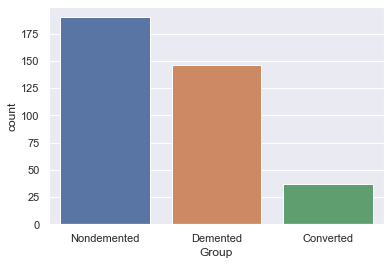

In [43]:
sns.countplot(x="Group",data=df)

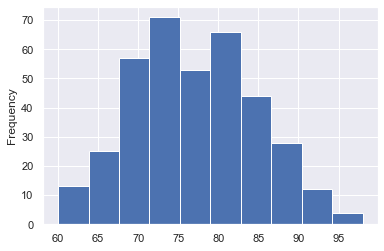

In [44]:
df["Age"].plot.hist()

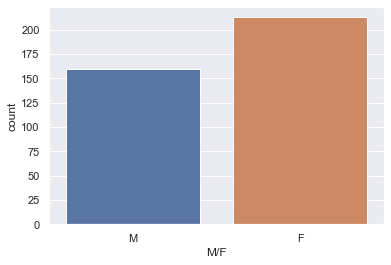

In [23]:
sns.countplot(x="M/F",data=df)

In [24]:
df['Age'].describe()

count    373.000000
mean      77.013405
std        7.640957
min       60.000000
25%       71.000000
50%       77.000000
75%       82.000000
max       98.000000
Name: Age, dtype: float64

In [45]:
df=df.dropna(axis=0,how="any")
pd.isnull(df).sum()


Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [26]:
df['Group'].value_counts


<bound method IndexOpsMixin.value_counts of 0      Nondemented
1      Nondemented
5      Nondemented
6      Nondemented
7      Nondemented
          ...     
368       Demented
369       Demented
370    Nondemented
371    Nondemented
372    Nondemented
Name: Group, Length: 354, dtype: object>

In [46]:
df = df.loc[df['Visit']==1] # use first visit data only because of the analysis we're doing
df = df.reset_index(drop=True) # reset index after filtering first visit data
df['M/F'] = df['M/F'].replace(['F','M'], [0,1]) # M/F column
df['Group'] = df['Group'].replace(['Converted'], ['Demented']) # Target variable
df['Group'] = df['Group'].replace(['Demented', 'Nondemented'], [1,0]) # Target variable
df = df.drop(['MRI ID', 'Visit', 'Hand'], axis=1) # Drop unnecessary columns

In [47]:
from sklearn.model_selection import train_test_split

feature_col_names = ["M/F", "Age", "EDUC", "SES", "MMSE", "eTIV", "nWBV", "ASF"]
predicted_class_names = ['Group']

X = df[feature_col_names].values
y = df[predicted_class_names].values

X_trainval, X_test, Y_trainval, Y_test = train_test_split(X, y,test_size=0.2,random_state=0)

In [30]:
len(X_trainval)


113

In [31]:
len(X_test)

29

In [32]:
X

array([[1.000e+00, 8.700e+01, 1.400e+01, ..., 1.987e+03, 6.960e-01,
        8.830e-01],
       [0.000e+00, 8.800e+01, 1.800e+01, ..., 1.215e+03, 7.100e-01,
        1.444e+00],
       [1.000e+00, 8.000e+01, 1.200e+01, ..., 1.689e+03, 7.120e-01,
        1.039e+00],
       ...,
       [0.000e+00, 7.200e+01, 1.600e+01, ..., 1.354e+03, 7.330e-01,
        1.296e+00],
       [1.000e+00, 8.000e+01, 1.600e+01, ..., 1.704e+03, 7.110e-01,
        1.030e+00],
       [0.000e+00, 6.100e+01, 1.300e+01, ..., 1.319e+03, 8.010e-01,
        1.331e+00]])

In [48]:
from sklearn.model_selection import train_test_split

feature_col_names = ["M/F", "Age", "EDUC", "SES", "MMSE", "eTIV", "nWBV", "ASF"]
predicted_class_names = ['Group']

X = df[feature_col_names].values
y = df[predicted_class_names].values

X_trainval, X_test, Y_trainval, Y_test = train_test_split(X, y,test_size=0.2,random_state=10)

In [ ]:
len(X_trainval)
len(X_test)

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [74]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=180)
model.fit(X_trainval,Y_trainval)

c:\users\smart\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=180,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [78]:
import pickle

with open('rfm','wb') as f:
    pickle.dump(model, f)
    f.close()

In [75]:
model.score(X_test,Y_test)

0.7931034482758621

In [59]:
y_predicted=model.predict(X_test) 

In [80]:
print(model.predict(X_test))

[0 1 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 1 0]


In [60]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,y_predicted)
cm

array([[12,  5],
       [ 3,  9]], dtype=int64)

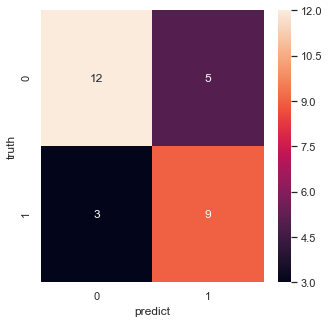

In [61]:
plt.figure(figsize=(5,5))
sns.heatmap(cm,annot=True)
plt.xlabel('predict')
plt.ylabel('truth')
plt.show()